
# <CENTER> AVERAGE WEIGHTED MOVIE RECOMMENDATION SYSTEM

* Notebook by: AKSHAY BHAT
* Motivation: Understand the science behind how a recommendation system recommends a particular product.
* Overview :This is a basic recommendation system which aims to recommend a set of movies similar to a particular movie.

* Dataset info : TMDB 5000 Movie Dataset | https://www.kaggle.com/tmdb/tmdb-movie-metadata
* Dataset contains two csv files involving movie and credits data

##  DATA LOADING AND PRE-PROCESSING

In [57]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [58]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [59]:
movies = pd.read_csv("tmdb_5000_movies.csv")

In [60]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [61]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [62]:
credits.shape

(4803, 4)

In [63]:
movies.shape

(4803, 20)

In [64]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [65]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

We have a few missing value records. Let's combine the dataframe before we deal with the missing values.

In [66]:
#Converting id tag into a same tag
credits=credits.rename(index=str, columns={"movie_id": "id"})


In [67]:
# Combining movies and credits dataframes based on movie ID.
movies = movies.merge(credits, on='id')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [68]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [69]:
# Dropping few columns which are not useful
movies = movies.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [70]:
#Checking duplicate records
movies.duplicated().sum()

0

In [71]:
movies.shape

(4803, 18)

# Defining weighted average 

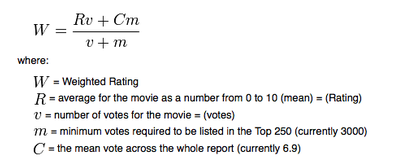
Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page

In [72]:
# Calculate all the components based on the above formula
v=movies['vote_count']
R=movies['vote_average']
C=movies['vote_average'].mean()
m=movies['vote_count'].quantile(0.70)

In [73]:
movies['weighted_average']=((R*v)+ (C*m))/(v+m)

In [74]:
movie_sorted_ranking=movies.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title','id', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,id,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,278,8205,8.5,8.340775,136.747729
3337,The Godfather,238,5893,8.4,8.192887,143.659698
662,Fight Club,550,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,680,8428,8.3,8.157615,121.463076
65,The Dark Knight,155,12002,8.2,8.102674,187.322927
809,Forrest Gump,13,7927,8.2,8.056059,138.133331
1818,Schindler's List,424,4329,8.3,8.038748,104.469351
3865,Whiplash,244786,4254,8.3,8.034695,192.528841
96,Inception,27205,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,1891,5879,8.2,8.010426,78.517830


###  Visualizing movies based on weighted average 

In [75]:
weight_ranking=movies.sort_values('weighted_average',ascending=False)

In [76]:
fig = go.Figure(go.Bar(
    x= weight_ranking['original_title'][:20], 
    y= weight_ranking['weighted_average'][:20],  
    marker_color=weight_ranking['weighted_average'][:20]
))

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Movies based on Weighted average',xaxis_title='Movie',
                 yaxis_title='Weighted average', title_x=0.5)

fig.show()


###  Visualizing movies based on popularity

In [77]:
popularity_ranking=movies.sort_values('popularity',ascending=False)

In [78]:
fig = go.Figure(go.Bar(
    x= popularity_ranking['original_title'][:20], 
    y= popularity_ranking['popularity'][:20],  
    marker_color=popularity_ranking['popularity'][:20]
))

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Movies based on popularity',xaxis_title='Movie',
                 yaxis_title='Popularity', title_x=0.5)

fig.show()

### Recommendation based on scaled weighted average and popularity score(50% priority each)

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [80]:
movies[['normalized_weight','normalized_popularity']]= movie_normalized_df

In [81]:
movies.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013,0.674339,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627,0.581403,0.158846


In [82]:
movies['score'] = movies['normalized_weight'] * 0.5 + movies['normalized_popularity'] * 0.5
movies_scored = movies.sort_values(['score'], ascending=False)
movies_scored[['original_title', 'normalized_weight', 'normalized_popularity', 'score']]

,original_title,normalized_weight,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
...,...,...,...,...
2122,Epic Movie,0.102239,0.006926,0.054583
210,Batman & Robin,0.019593,0.057189,0.038391
3746,The Boy Next Door,0.039279,0.027595,0.033437
242,Fantastic Four,0.017935,0.043544,0.030740


In [83]:
fig = go.Figure(go.Bar(
    x= movies_scored['original_title'][:20], 
    y= movies_scored['score'][:20],  
    marker_color=movies_scored['score'][:20]
))

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top rated and popular blend',xaxis_title='Movie',
                 yaxis_title='score', title_x=0.5)

fig.show()

In [84]:
movies_scored.to_csv(r'movies1.csv', index = False)